In [145]:
# read in the data
import sqlite3
import pandas as pd

# DISS, STWMRKT, IPSWICH, MANNGTR, STFD, LIVST,    SHENFLD, NRCH
conn = sqlite3.connect("..\data\dataset.sqlite")
df = pd.read_sql_query("""SELECT * FROM dataset WHERE tpl_from="DISS" 
                          AND tpl_to="NRCH" AND delay_change<=5 AND delay_change>=-5 """, conn)
conn.close()
df.head

<bound method NDFrame.head of       tpl_from tpl_to  day_of_week  weekday  off_peak  hour_of_day  delay  \
0         DISS   NRCH            6        0         1            7      3   
1         DISS   NRCH            6        0         1            8      1   
2         DISS   NRCH            6        0         1            9      1   
3         DISS   NRCH            6        0         1           10      1   
4         DISS   NRCH            6        0         1           11      0   
...        ...    ...          ...      ...       ...          ...    ...   
24942     DISS   NRCH            2        1         0           19      5   
24943     DISS   NRCH            2        1         1           20      4   
24944     DISS   NRCH            2        1         1           21      3   
24945     DISS   NRCH            2        1         1           22     -2   
24946     DISS   NRCH            2        1         1           23     -1   

       delay_change  
0                 2  
1

In [4]:
# assign attributes and labels
x = df.iloc[:, 2:-1].values
y = df.iloc[:, 7].values

In [6]:
# split the data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# scale the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [102]:
# train the network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), activation='tanh', max_iter=500)  
# activation='tanh', solver='sgd', verbose='True'
mlp.fit(x_train, y_train)  

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 5), max_iter=500)

In [127]:
pred = mlp.predict(x_test)
from sklearn.metrics import classification_report, r2_score, mean_squared_error, accuracy_score
from math import sqrt

print("iterations:", mlp.n_iter_)
print("outputs:", mlp.n_outputs_)
print("acc  = {:.4f}".format(accuracy_score(y_test, pred)))
print("r2   = {:.4f}".format(r2_score(y_test, pred)))
print("MSE  = {:.4f}".format(mean_squared_error(y_test, pred)))
print("RMSE = {:.4f}".format(sqrt(mean_squared_error(y_test, pred))))
print(classification_report(y_test,pred))

iterations: 308
outputs: 43
acc  = 0.4951
r2   = 0.0360
MSE  = 3.7176
RMSE = 1.9281
              precision    recall  f1-score   support

         -26       0.00      0.00      0.00         1
          -6       0.00      0.00      0.00         1
          -4       0.00      0.00      0.00         2
          -3       0.00      0.00      0.00         1
          -2       0.00      0.00      0.00        10
          -1       0.60      0.02      0.04       140
           0       0.65      0.42      0.51      1307
           1       0.50      0.58      0.54      2636
           2       0.45      0.70      0.55      2426
           3       0.00      0.00      0.00       725
           4       0.00      0.00      0.00       180
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        

In [18]:
# # train a set
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, r2_score, mean_squared_error, accruracy_score
# test_details = []
# r2 = []
# mse = []
# acc = []
# test_num = 1

# for i in range(1, 12):
#     for j in range(1, 12):
#         for k in range(1, 12):
#             mlp = MLPClassifier(hidden_layer_sizes=(i, j, k), max_iter=500)  
#             # activation='tanh', solver='sgd', verbose='True'
#             mlp.fit(x_train, y_train)
#             pred = mlp.predict(x_test)
#             test_details.append([test_num, i, j, k, mlp.n_iter_])
#             r2.append([test_num, r2_score(y_test, pred)])
#             mse.append([test_num, mean_squared_error(y_test, pred)])
#             acc.append([test_num, accuracy_score(y_test, pred)])
#             test_num += 1

best r2: 0.1962724182639347 test details: [981, 9, 2, 2, 413, 'log_loss']
best MSE: 4.196286472148541 test details: [981, 9, 2, 2, 413, 'log_loss']
[981, 0.1962724182639347]
[981, 9, 2, 2, 413, 'log_loss']
[1212, 0.18668306421509262]
[1212, 11, 1, 2, 282, 'log_loss']
[1221, 0.18266103933809474]
[1221, 11, 1, 11, 487, 'log_loss']
[742, 0.18183546581071108]
[742, 7, 2, 5, 311, 'log_loss']
[1311, 0.18145443187499544]
[1311, 11, 10, 2, 378, 'log_loss']
[379, 0.18143326332301124]
[379, 4, 2, 5, 360, 'log_loss']
[858, 0.18098872373134312]
[858, 8, 1, 11, 420, 'log_loss']
[370, 0.18003613889205416]
[370, 4, 1, 7, 500, 'log_loss']
[1097, 0.17946458798848075]
[1097, 10, 1, 8, 266, 'log_loss']
[1213, 0.17908355405276521]
[1213, 11, 1, 3, 303, 'log_loss']
[855, 0.17836382328530243]
[855, 8, 1, 8, 264, 'log_loss']
[255, 0.1759506083591037]
[255, 3, 2, 2, 445, 'log_loss']
[977, 0.17576009139124593]
[977, 9, 1, 9, 322, 'log_loss']
[1219, 0.17440530406425725]
[1219, 11, 1, 9, 217, 'log_loss']
[737, 0

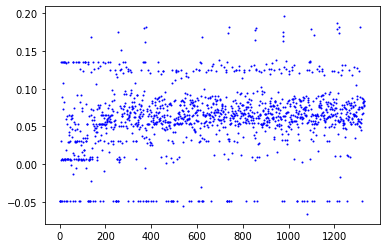

In [41]:
r2.sort(key=lambda x: x[1], reverse=True)
mse.sort(key=lambda x: x[1])

# find the best
best_r2 = r2[0][1]
best_r2_test = r2[0][0]

best_mse = mse[0][1]
best_mse_test = mse[0][0]

best_r2_details = []
best_mse_details = []
for record in test_details:
    if record[0] == best_r2_test:
        best_r2_details.extend(record)
    if record[0] == best_mse_test:
        best_mse_details.extend(record)

print("best r2:", r2[0][1], "test details:", best_r2_details)
print("best MSE:", mse[0][1], "test details:", best_r2_details)

best_20_r2 = r2[:20]
best_20_mse = mse[:20]

best_20_r2_details = []
for test in best_20_r2:
    for record in test_details:
        if test[0] == record[0]:
            best_20_r2_details.append(record)
            break

best_20_mse_details = []
for test in best_20_mse:
    for record in test_details:
        if test[0] == record[0]:
            best_20_mse_details.append(record)
            break

for i in range(len(best_20_r2)):
    print(best_20_r2[i])
    print(best_20_r2_details[i])

print("*********************")
for i in range(len(best_20_r2)):
    print(best_20_mse[i])
    # print(best_20_mse_details[i])

# plots
import matplotlib.pyplot as plt

# plot test numbers against r2 values
plt.scatter([x[0] for x in r2], [x[1] for x in r2], s=1, color="blue", label="r2")


In [146]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 

# assign attributes and labels
x = df.iloc[:, 2:-1].values
y = df.iloc[:, 7].values

test_2_details = []
r2_2 = []
mse_2 = []
acc_2 = []
test_num = 1

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
    # scale the data
    scaler = StandardScaler()  
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)  
    x_test = scaler.transform(x_test) 

    mlp = MLPClassifier(hidden_layer_sizes=(5), activation='tanh', max_iter=500, learning_rate_init=0.003)  
    # activation='tanh', solver='sgd', verbose='True'
    mlp.fit(x_train, y_train)
    pred = mlp.predict(x_test)
    test_2_details.append([test_num, mlp.n_iter_])
    r2_2.append(r2_score(y_test, pred))
    mse_2.append(mean_squared_error(y_test, pred))
    acc_2.append(accuracy_score(y_test, pred))
    print("completed test", test_num)
    test_num += 1

completed test 1
completed test 2
completed test 3
completed test 4
completed test 5


In [147]:
for i in range(len(test_2_details)):
    print(test_2_details[i], r2_2[i], mse_2[i], acc_2[i], "|")

print("acc = {:.4f}".format(sum(acc_2)/len(acc_2)))
print("r2  = {:.4f}".format(sum(r2_2)/len(r2_2)))
avg_mse = sum(mse_2)/len(mse_2)
print("mse = {:.4f}".format(avg_mse))
print("RMSE= {:.4f}".format(sqrt(avg_mse)))


[1, 300] 0.27978426743982876 0.8245824983299933 0.5060788243152973 |
[2, 282] 0.2662364550912171 0.8338009352037408 0.5140948563794255 |
[3, 317] 0.27307415324867 0.8303273213092852 0.5062124248496994 |
[4, 214] 0.2911206132686457 0.7946559786239145 0.5206412825651303 |
[5, 351] 0.2696604823045953 0.8299265197060788 0.5147628590514363 |
acc = 0.5124
r2  = 0.2760
mse = 0.8227
RMSE= 0.9070


Text(0, 0.5, 'Accruracy of Model')

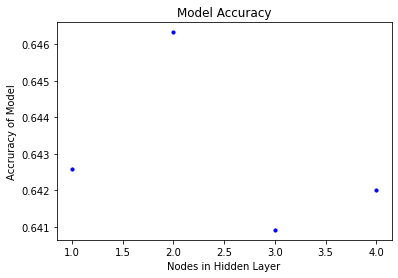

In [98]:
plt.scatter([x[0]+1 for x in acc_2], [y[1] for y in acc_2], s=10, color="blue")
plt.title("Model Accuracy")
plt.xlabel("Nodes in Hidden Layer")
plt.ylabel("Accruracy of Model")